In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
num_data = {
    'netifier': 7773,
    'dat': 500,
    'hsd': 13169,
    'casa': 1080,
    'hoasa': 2854,
}

In [ ]:
def average_results(results):
    return pd.concat(results).groupby(level=0).mean()

def plot_results(dataset, result, metric='F1 Micro'):
    data_used = [round(x / num_data[dataset] * 100, 0) for x in result['lc']['Data Used']]
    plt.figure(figsize=(15, 10))

    for method in result.keys():
        if method != 'passive':
            plt.plot(data_used, result[method][metric], label=method.upper(), marker='o')
        elif metric != 'Sampling Duration':
            plt.plot(data_used, result[method][metric], label=method.upper(), linestyle='--', color='black')

    plt.title(dataset.upper())
    plt.xlabel("Data Used (%)")
    plt.ylabel(metric)
    plt.legend(fontsize='x-large')
    plt.grid(True, axis='x')

    plt.xticks(data_used)
    plt.tight_layout()
    plt.show()

In [4]:
def load_result(dataset, ignored_method=None):
    methods = ['lc', 'mc', 'kmeans', 'coreset', 'comal', 'besra', 'random']
    result = {}

    if ignored_method is not None:
        for method in ignored_method:
            methods.remove(method)
    
    for method in methods:
        for i in range (1, 6):
            if i == 1:
                result[method] = [pd.read_csv(f"../{dataset}/metrics/{dataset}-{method}-{i}-results.csv")]
            else:
                result[method].append(pd.read_csv(f"../{dataset}/metrics/{dataset}-{method}-{i}-results.csv"))

    for method in methods:
        result[method] = average_results(result[method])
    
    passive_result = pd.read_csv(f"../{dataset}/metrics/{dataset}-passive-results.csv")
    result['passive'] = pd.DataFrame({
        'Accuracy': [np.mean(passive_result['Accuracy']) for i in range(len(result['lc']))],
        'F1 Micro': [np.mean(passive_result['F1 Micro']) for i in range(len(result['lc']))],
        'F1 Macro': [np.mean(passive_result['F1 Macro']) for i in range(len(result['lc']))],
    })

    return result

# NETIFIER

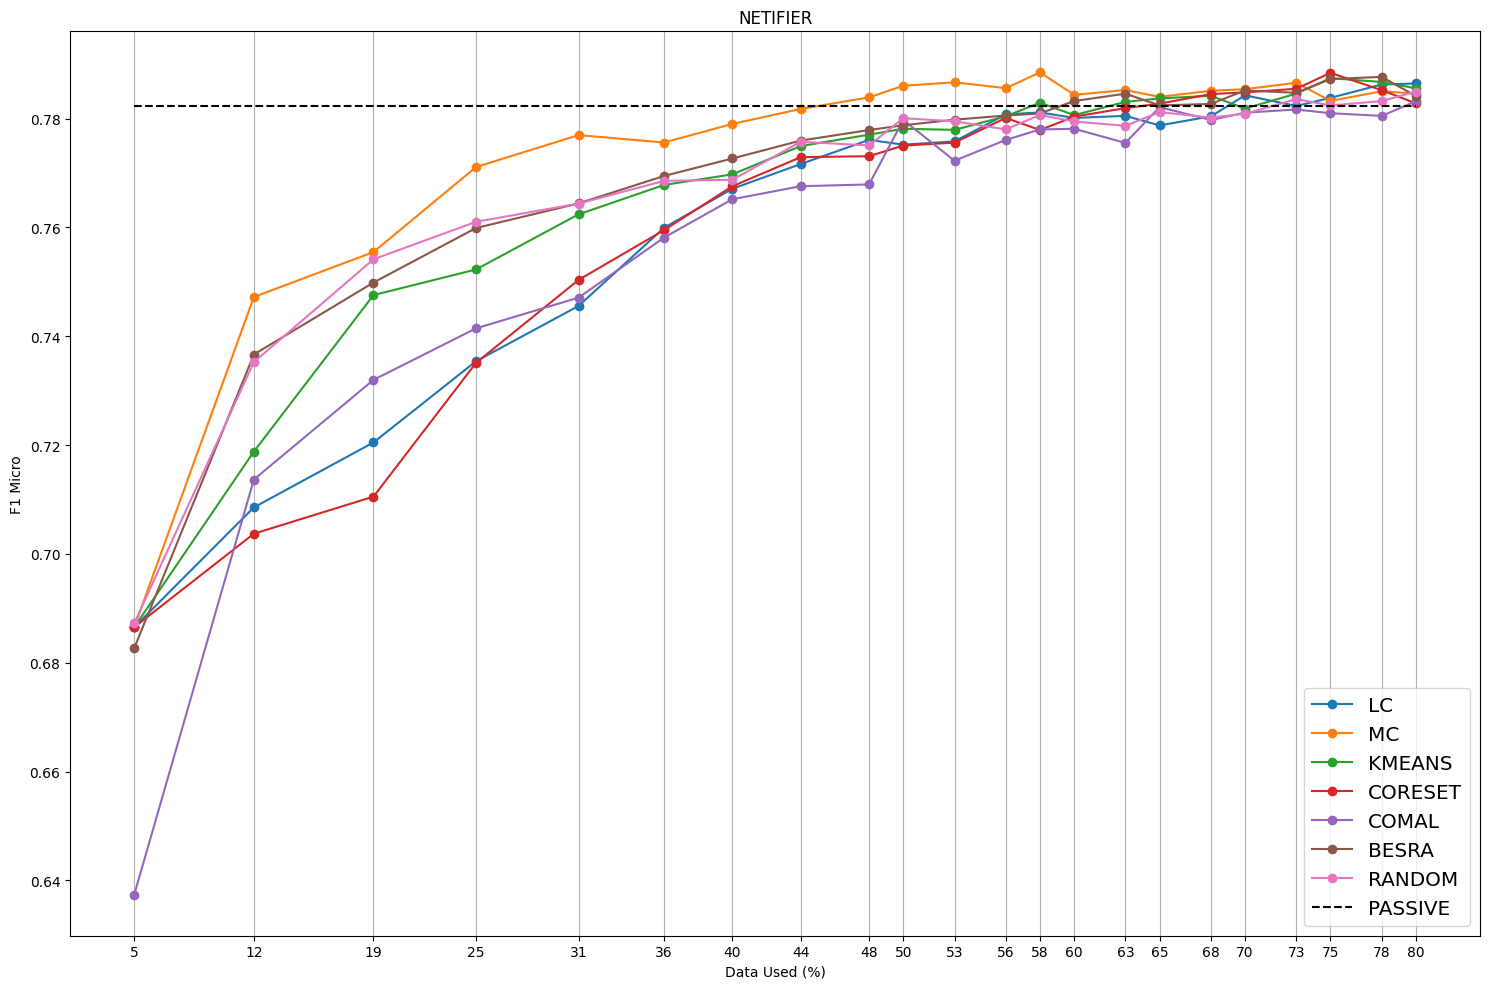

In [5]:
result = load_result('netifier')
plot_results('netifier', result)

# DOCTOR'S ANSWER TEXT

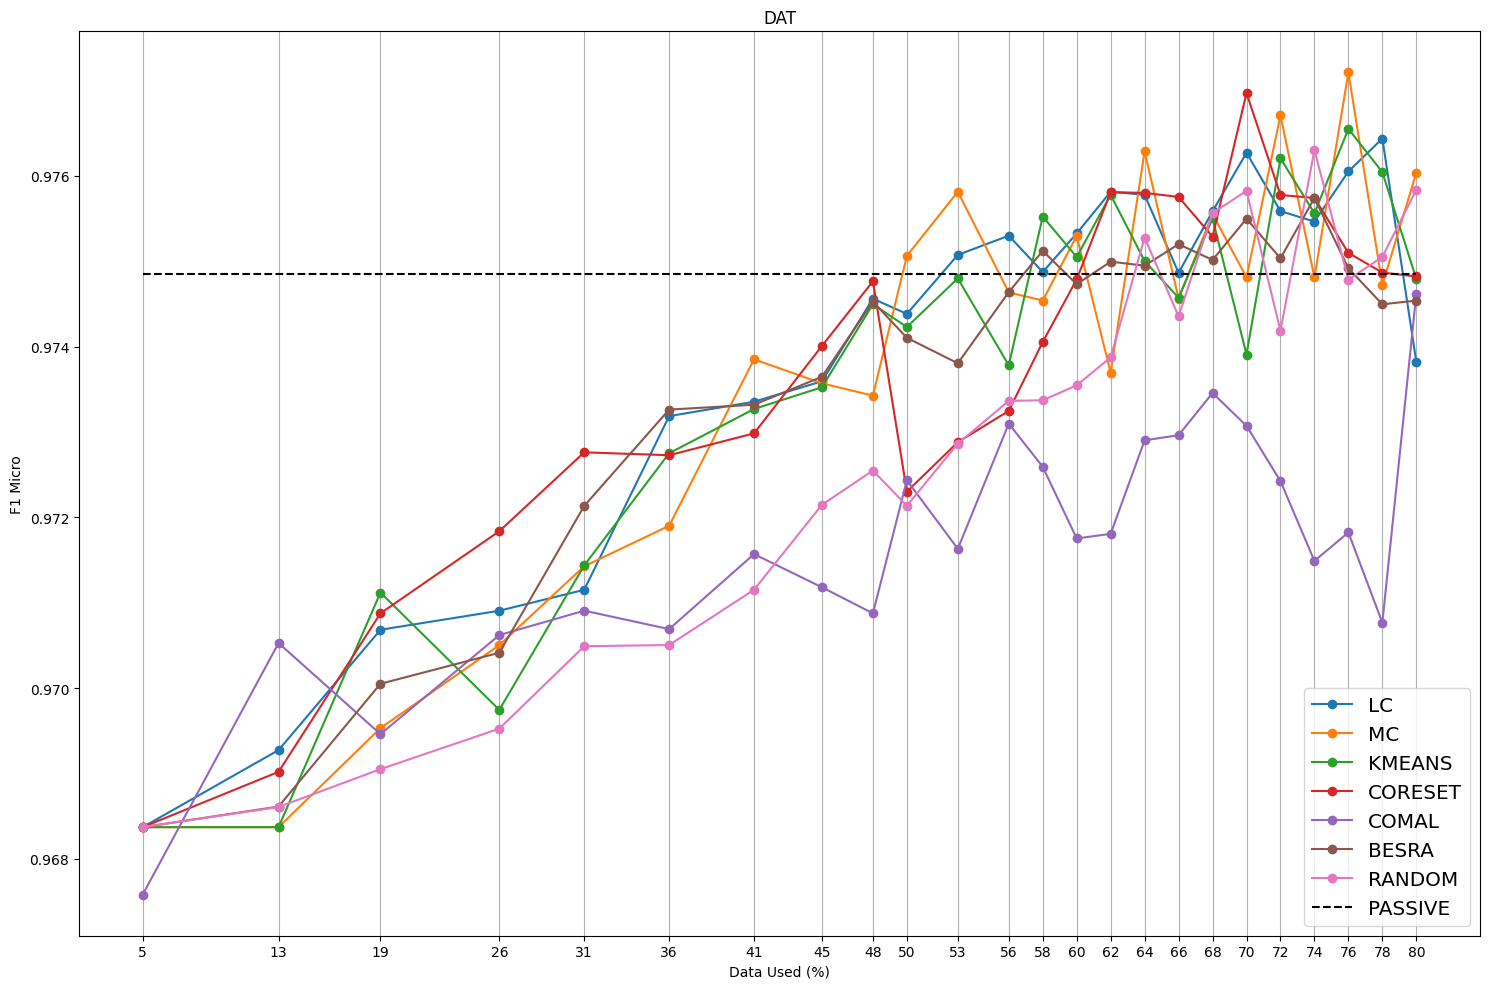

In [6]:
result = load_result('dat')
plot_results('dat', result)

# HATE SPEECH DETECTION

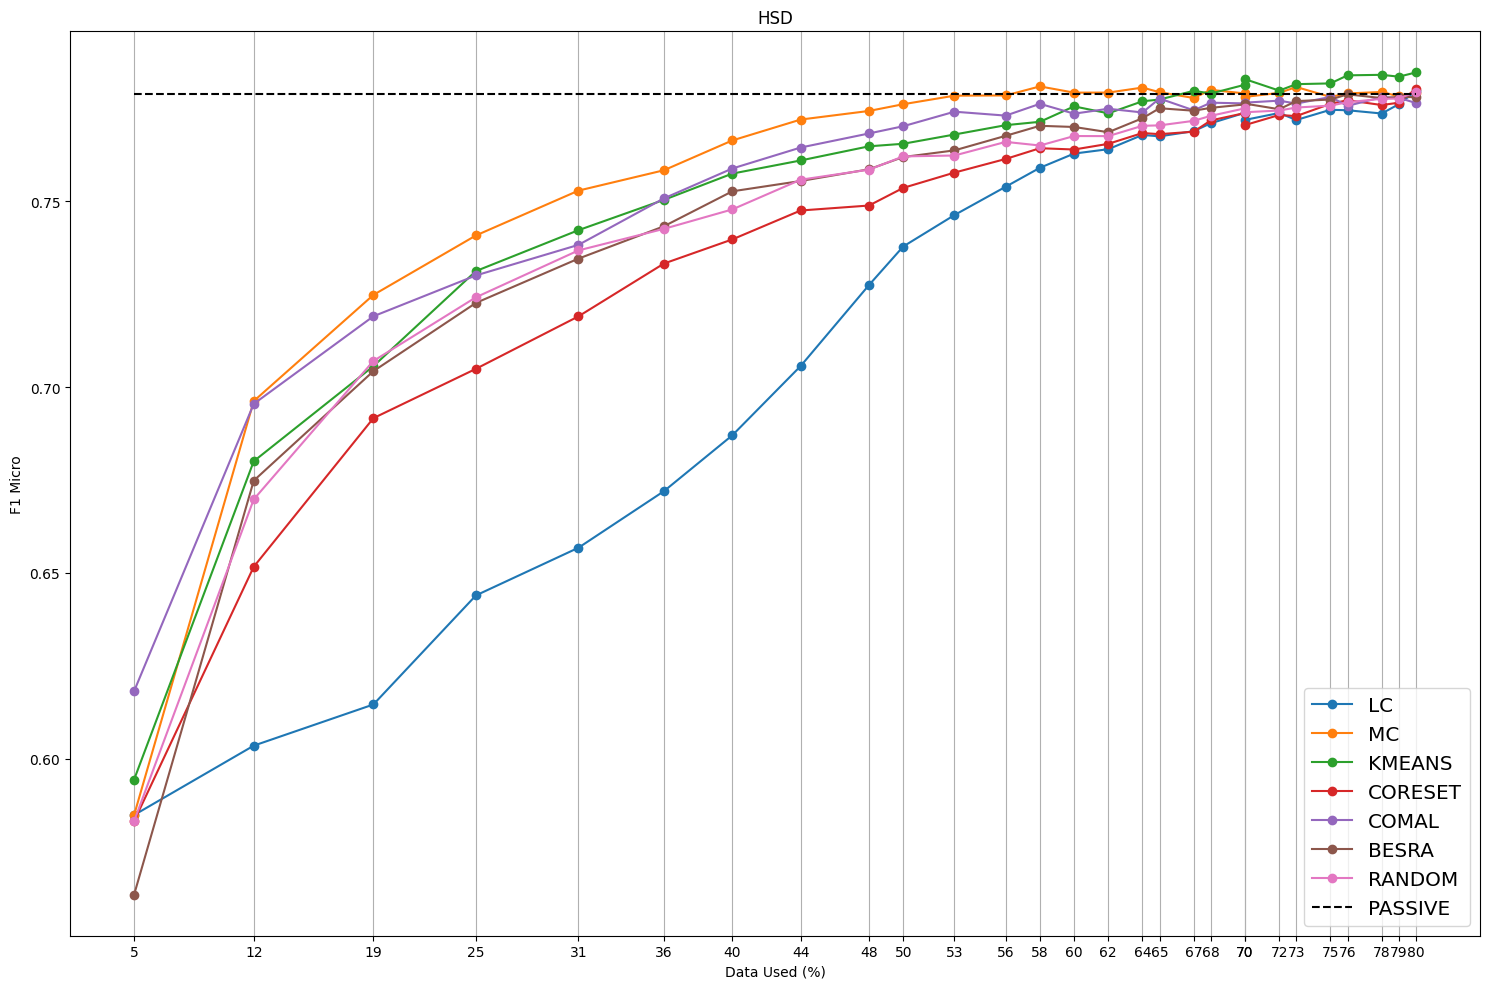

In [7]:
result = load_result('hsd')
plot_results('hsd', result)

# CASA

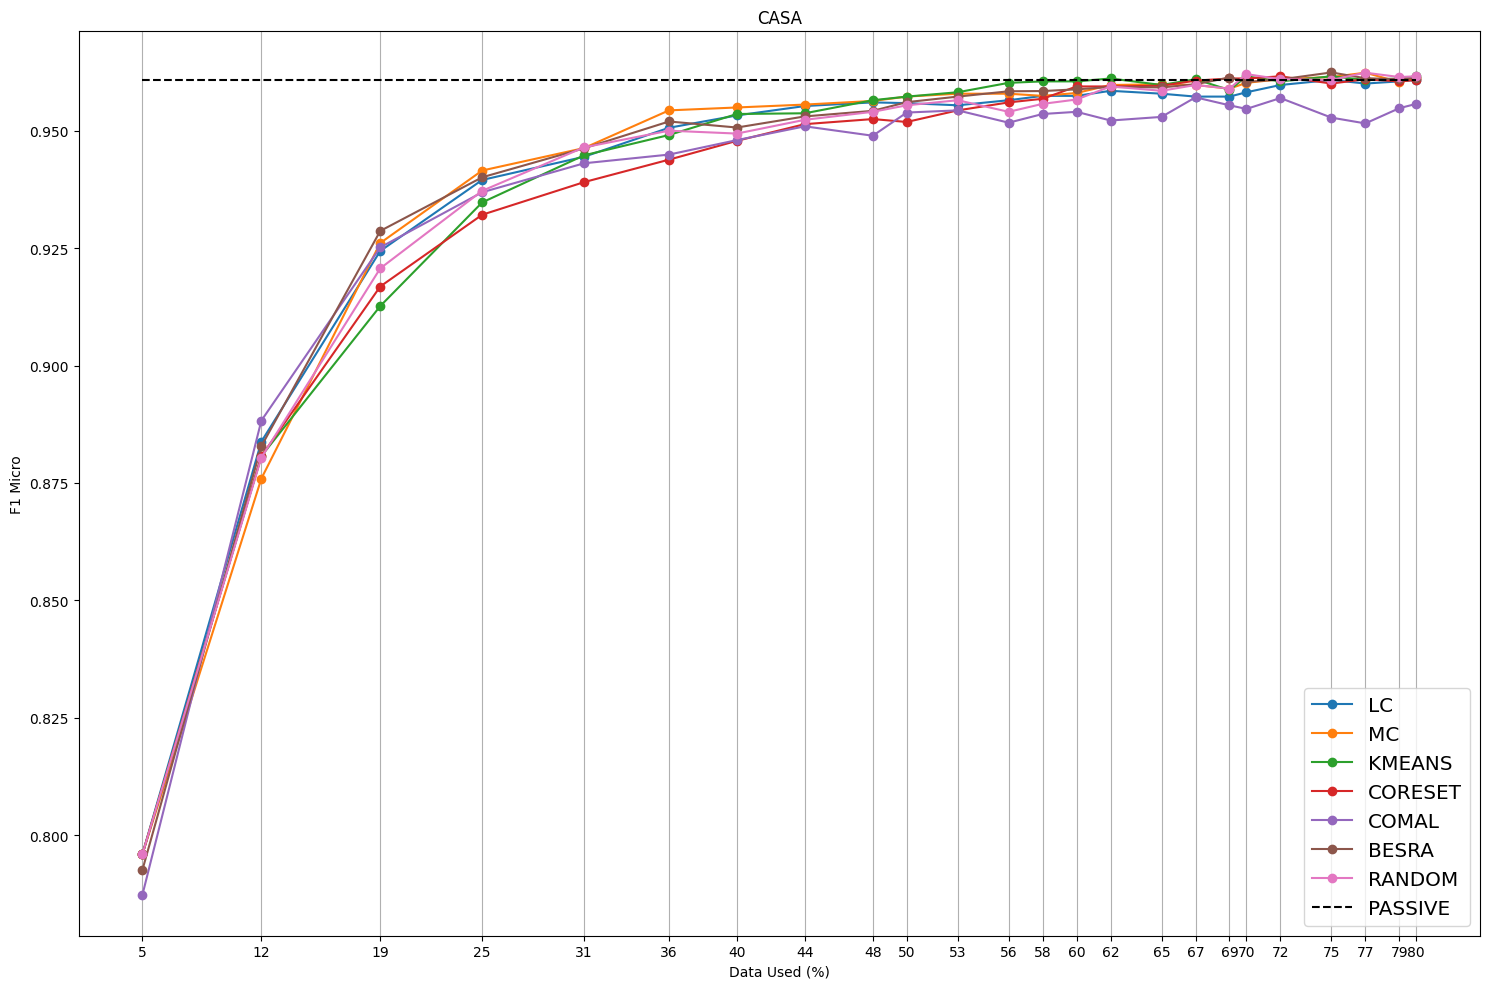

In [8]:
result = load_result('casa')
plot_results('casa', result)

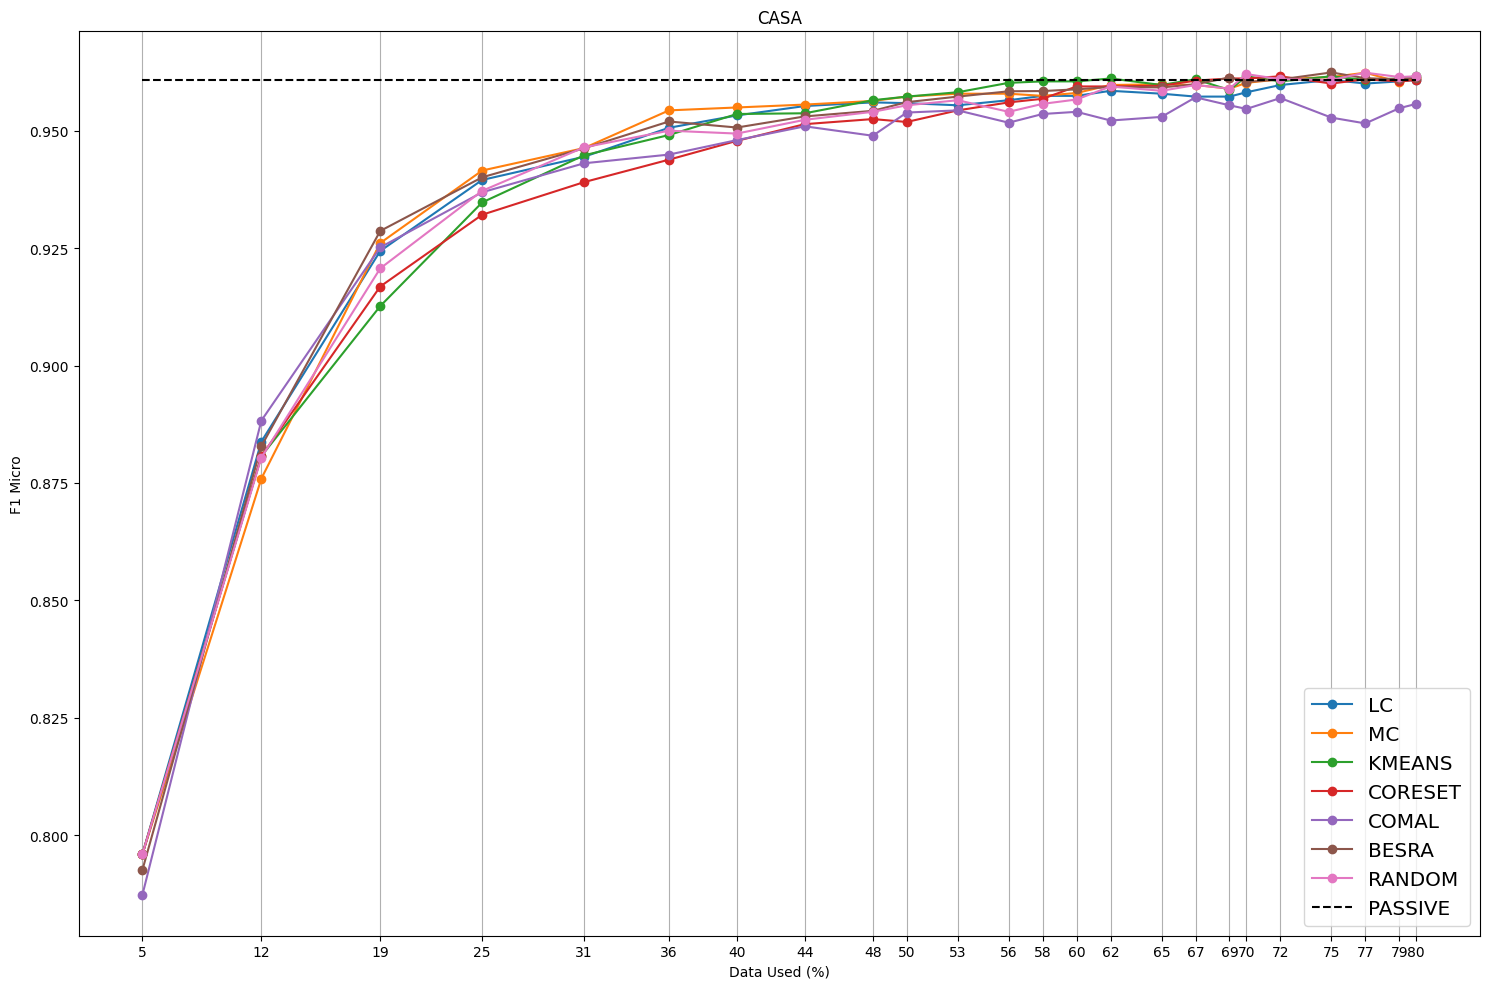

In [9]:
result = load_result('casa')
plot_results('casa', result)

# HOASA

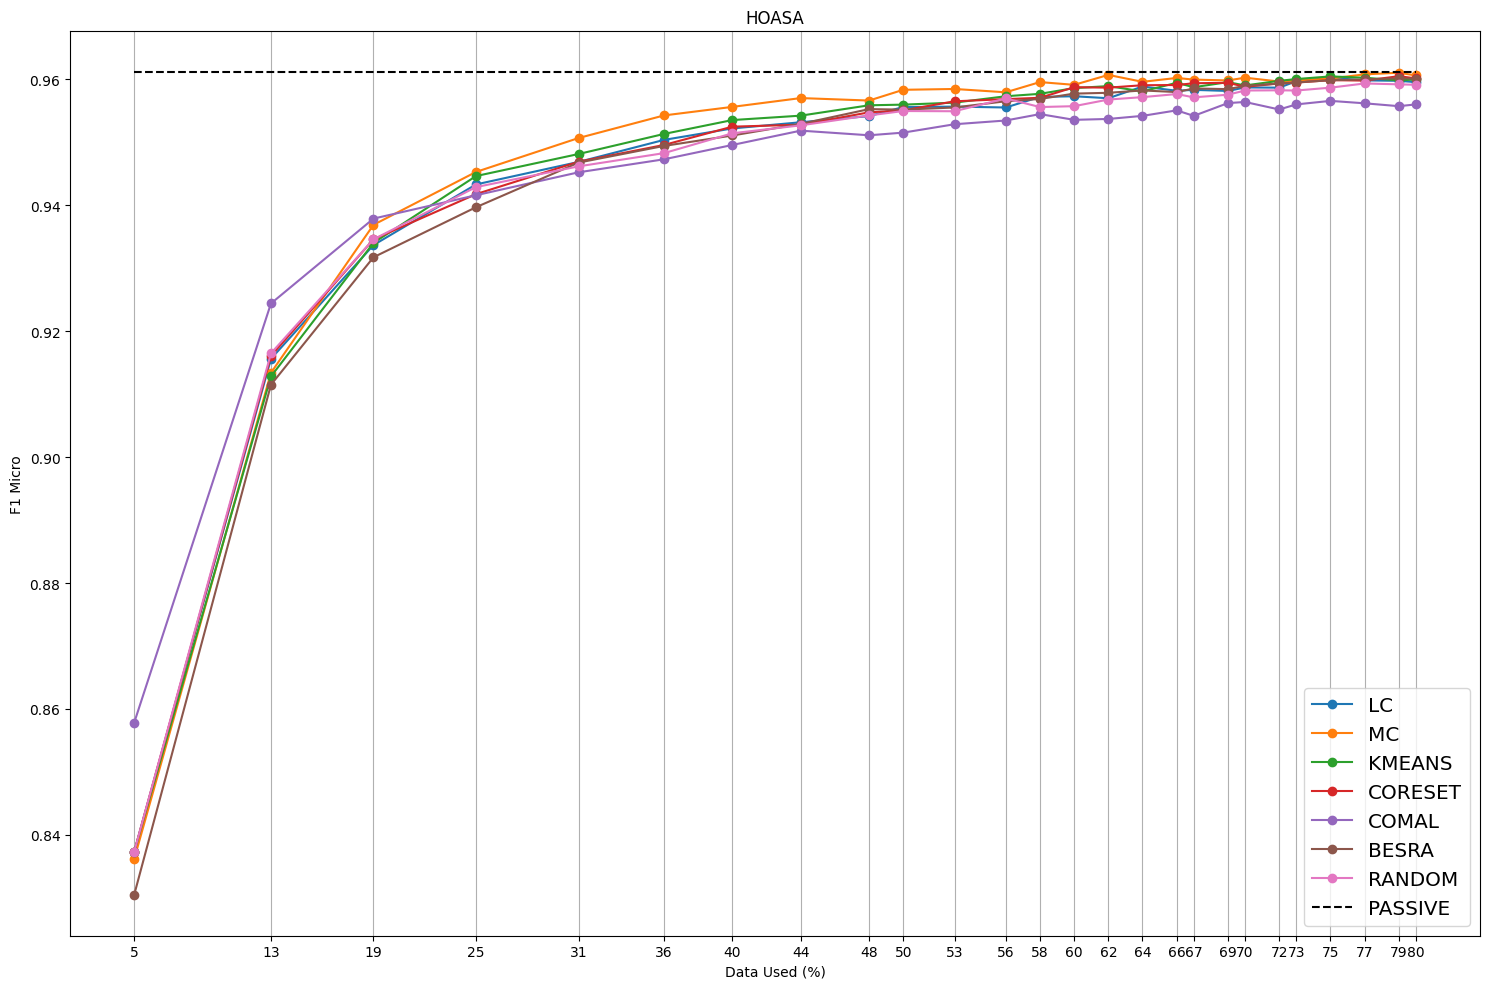

In [10]:
result = load_result('hoasa')
plot_results('hoasa', result)

# SAMPLING DURATION

Method: lc, Avg time per iteration: 15.404217149994592 s
Method: mc, Avg time per iteration: 47.129322264411236 s
Method: kmeans, Avg time per iteration: 17.099750421263956 s
Method: coreset, Avg time per iteration: 17.772968422282823 s
Method: comal, Avg time per iteration: 40.10136539502577 s
Method: besra, Avg time per iteration: 46.869541777264 s
Method: random, Avg time per iteration: 0.014399439638311168 s


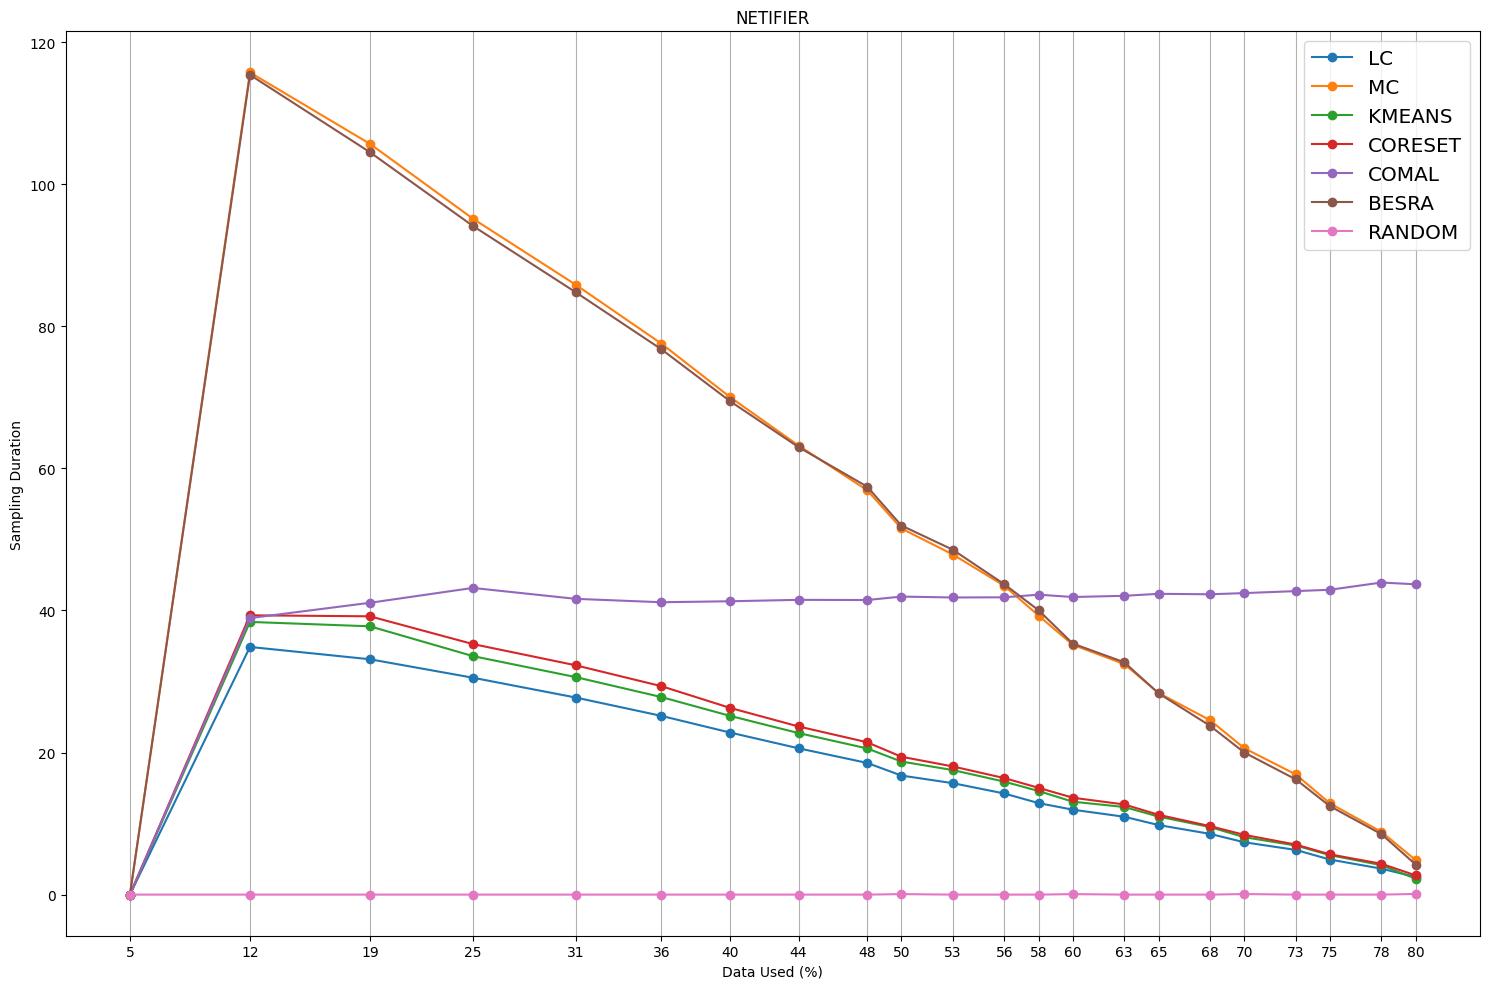

In [11]:
result = load_result('netifier')

for method in result.keys():
    if method == 'passive':
        continue
    print(f"Method: {method}, Avg time per iteration: {result[method]['Sampling Duration'].mean()} s")

plot_results('netifier', result, 'Sampling Duration')

Method: lc, Avg time per iteration: 3.253905572493871 s
Method: mc, Avg time per iteration: 8.248901945352555 s
Method: kmeans, Avg time per iteration: 3.5824823101361596 s
Method: coreset, Avg time per iteration: 3.444771367311478 s
Method: comal, Avg time per iteration: 7.834287909666696 s
Method: besra, Avg time per iteration: 8.270532947778703 s
Method: random, Avg time per iteration: 0.0028113126754760673 s


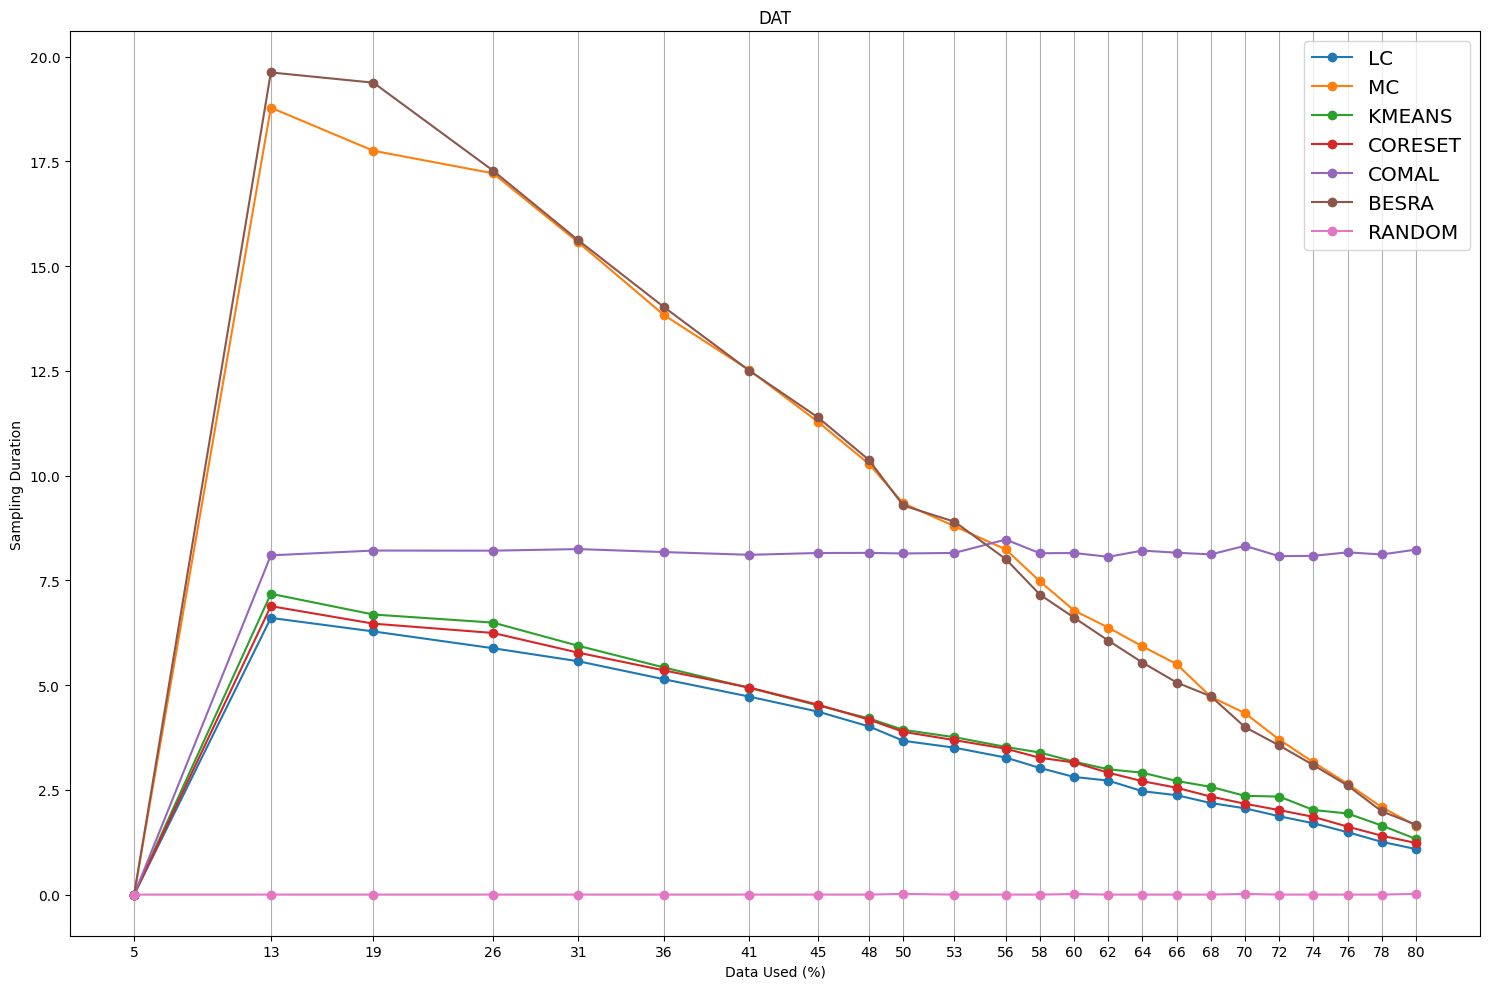

In [12]:
result = load_result('dat')

for method in result.keys():
    if method == 'passive':
        continue
    print(f"Method: {method}, Avg time per iteration: {result[method]['Sampling Duration'].mean()} s")
    
plot_results('dat', result, 'Sampling Duration')

Method: lc, Avg time per iteration: 15.820566638878415 s
Method: mc, Avg time per iteration: 47.89349296092987 s
Method: kmeans, Avg time per iteration: 18.404302053792133 s
Method: coreset, Avg time per iteration: 16.283743097100935 s
Method: comal, Avg time per iteration: 46.365290287562786 s
Method: besra, Avg time per iteration: 46.72248981850488 s
Method: random, Avg time per iteration: 0.03431854588644841 s


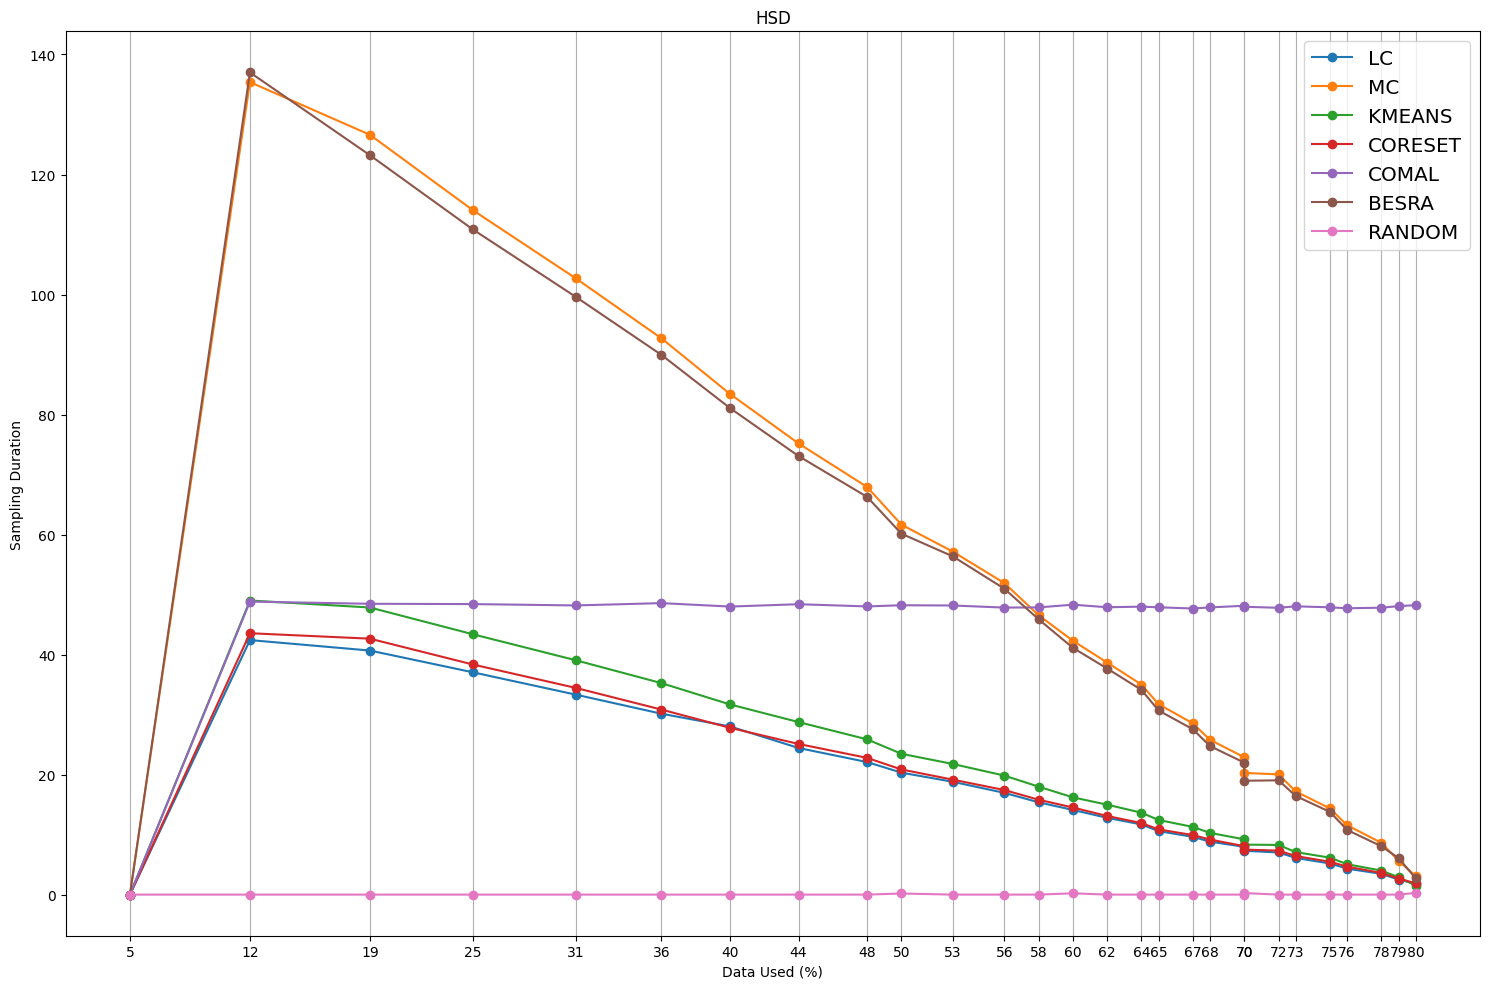

In [13]:
result = load_result('hsd')

for method in result.keys():
    if method == 'passive':
        continue
    print(f"Method: {method}, Avg time per iteration: {result[method]['Sampling Duration'].mean()} s")
    
plot_results('hsd', result, 'Sampling Duration')

Method: lc, Avg time per iteration: 3.293455922603607 s
Method: mc, Avg time per iteration: 6.227649414539338 s
Method: kmeans, Avg time per iteration: 7.0675351937611905 s
Method: coreset, Avg time per iteration: 7.09504771232605 s
Method: comal, Avg time per iteration: 16.3874960899353 s
Method: besra, Avg time per iteration: 7.004629037777582 s
Method: random, Avg time per iteration: 0.0015715519587198637 s


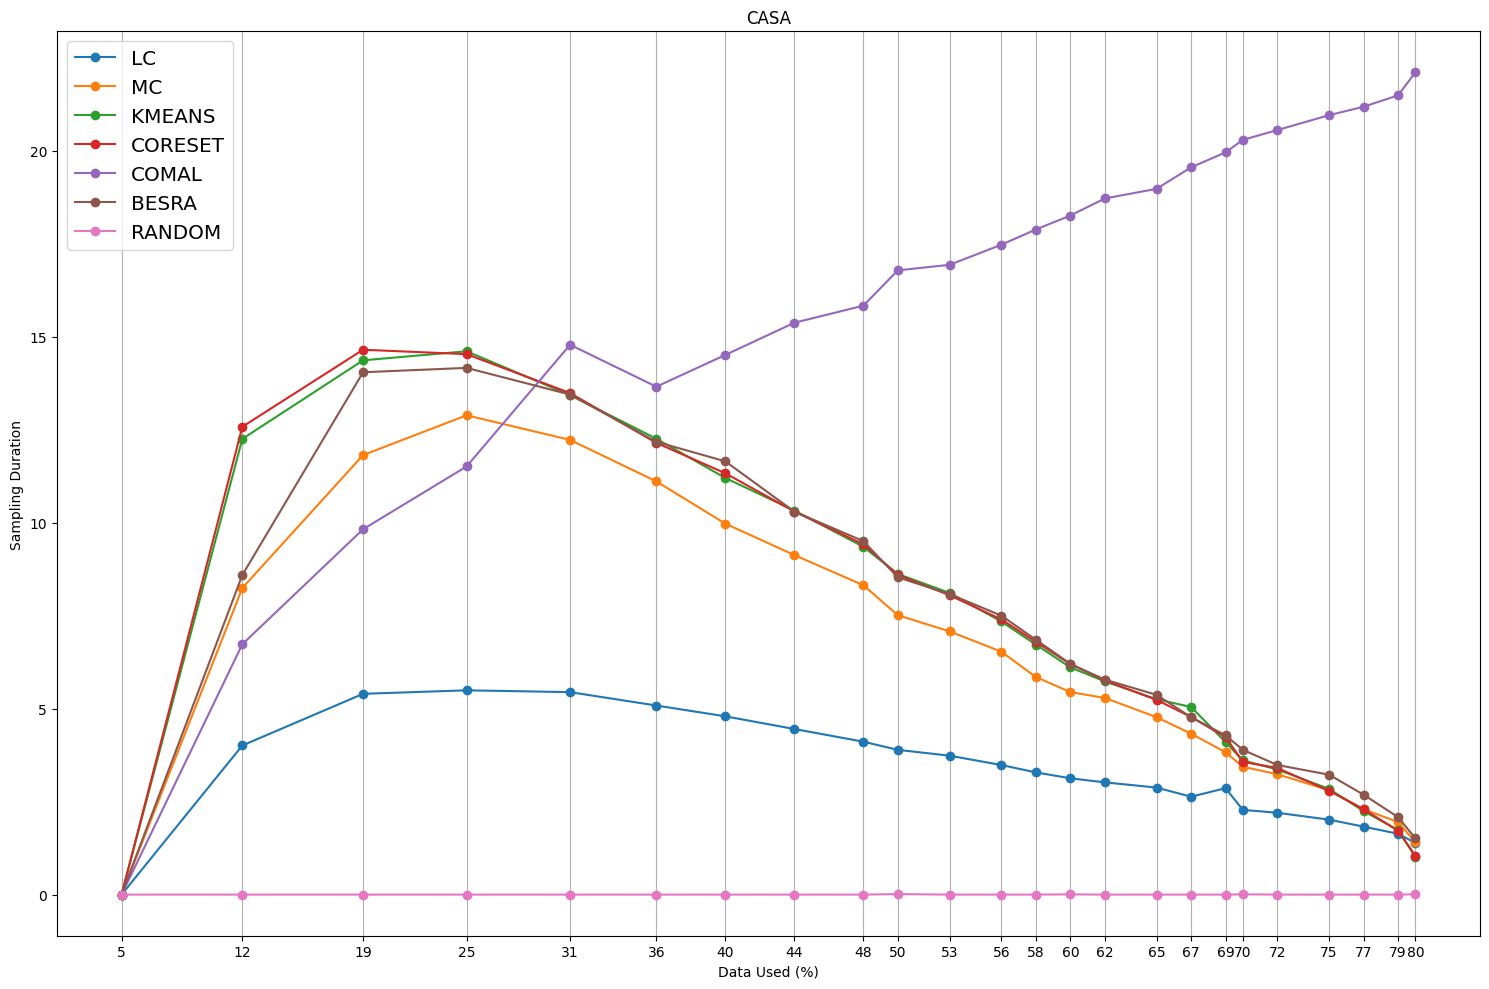

In [14]:
result = load_result('casa')

for method in result.keys():
    if method == 'passive':
        continue
    print(f"Method: {method}, Avg time per iteration: {result[method]['Sampling Duration'].mean()} s")
    
plot_results('casa', result, 'Sampling Duration')

Method: lc, Avg time per iteration: 7.03290396286891 s
Method: mc, Avg time per iteration: 17.000753343105316 s
Method: kmeans, Avg time per iteration: 26.462300329941968 s
Method: coreset, Avg time per iteration: 25.767630632107075 s
Method: comal, Avg time per iteration: 57.36734135517708 s
Method: besra, Avg time per iteration: 19.939299629284783 s
Method: random, Avg time per iteration: 0.0031848448973435203 s


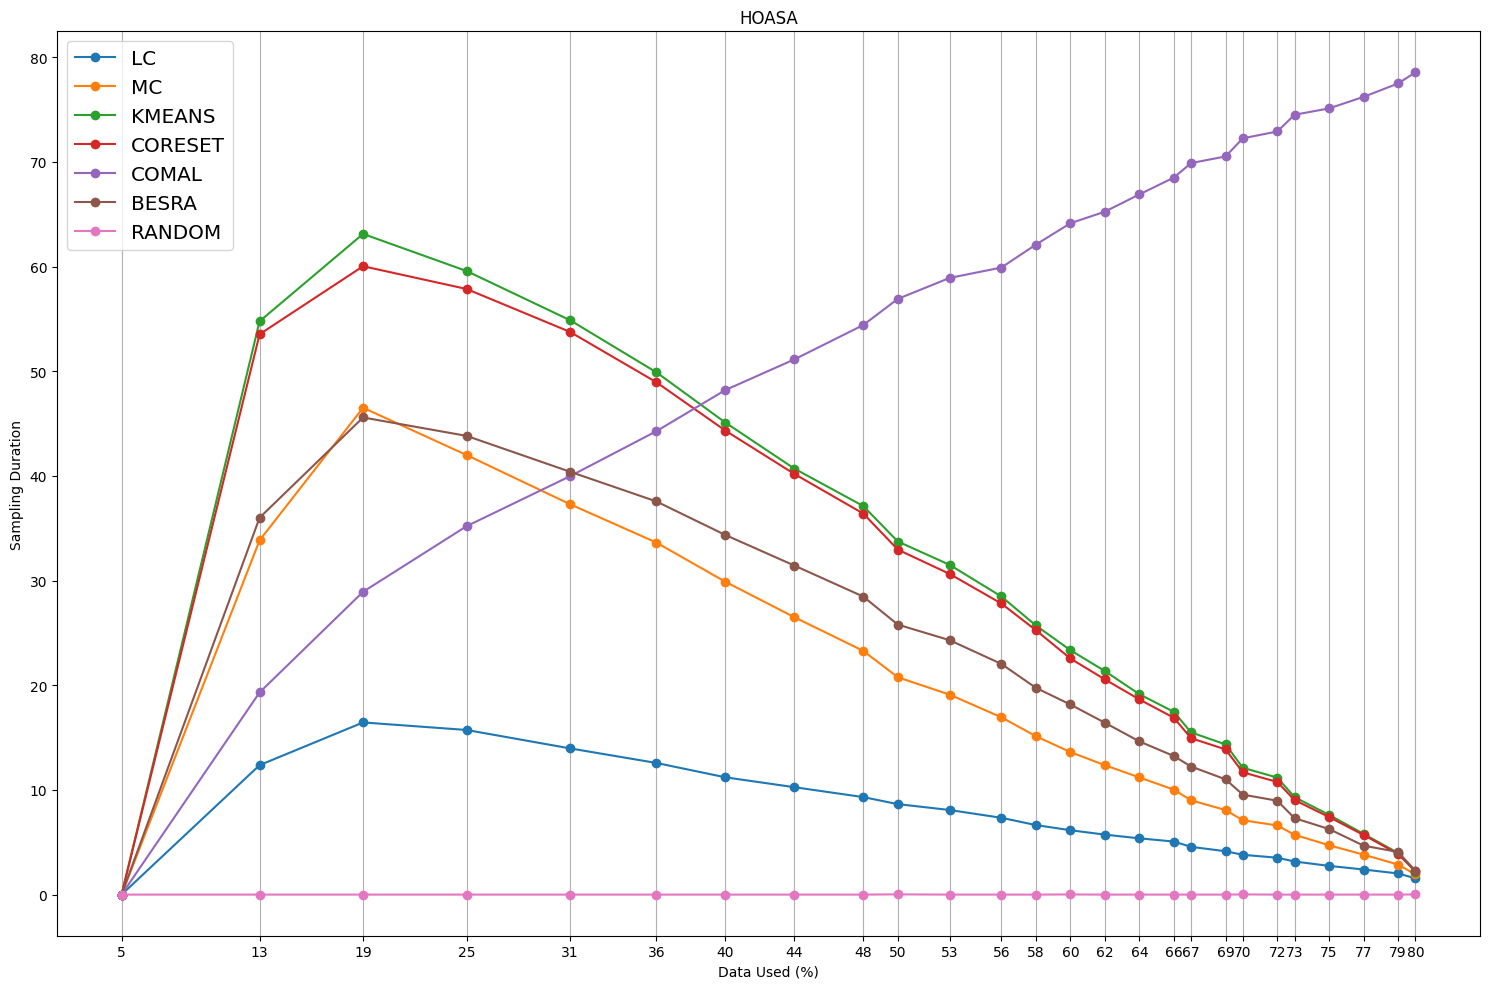

In [15]:
result = load_result('hoasa')

for method in result.keys():
    if method == 'passive':
        continue
    print(f"Method: {method}, Avg time per iteration: {result[method]['Sampling Duration'].mean()} s")
    
plot_results('hoasa', result, 'Sampling Duration')